# 'DATA-GET-TO-KNOW' and Exploratory Data Analysis

### Hypothesis: What could affect flight delays?
1. departure/arrival location (airport) i.e. busy airports possibly have more delays
2. day of week
3. weather
4. airline
5. time of the day (hour)

In [1]:
import pandas as pd

In [2]:
#Filename 'flights_2019_passengers' is a combined data of 2019 flight sample & passenger info & weather condition 

flights = pd.read_csv(r'C:\Users\Irene\lighthouse-data-notes\midterm_updated\mid-term-project-I\data\flights_2019_passengers.csv')

In [3]:
# to check outliers 
flights.arr_delay.quantile([0.05,0.5,0.90,0.95,0.99,0.995])

0.050    -26.0
0.500     -6.0
0.900     43.0
0.950     79.0
0.990    190.0
0.995    254.0
Name: arr_delay, dtype: float64

In [4]:
#Text split to have states only for data visualization (to see the relationship between departing/arriving location and delay)

flights['origin_state'] = flights['origin_city_name'].apply(lambda x: x[-2:])
flights['dest_state'] = flights['dest_city_name'].apply(lambda x: x[-2:])

In [5]:
flights.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dep_condition,arr_date,arr_condition,month,year,average_seats,average_passengers,avg_passenger_capacity_usage,origin_state,dest_state
0,2019-01-01,AA,AA_CODESHARE,AA,3044,OO,N761ND,3044,13930,ORD,...,Overcast,2019-01-01,Partly cloudy,1,2019,1002.000000,777.666667,0.776114,IL,CO
1,2019-01-01,AA,AA_CODESHARE,AA,5606,OH,N575NN,5606,13577,MYR,...,Cloudy,2019-01-01,Sunny,1,2019,6327.333333,4898.333333,0.774154,SC,NC


# Data Visualization 

### 1. total delay time distribution

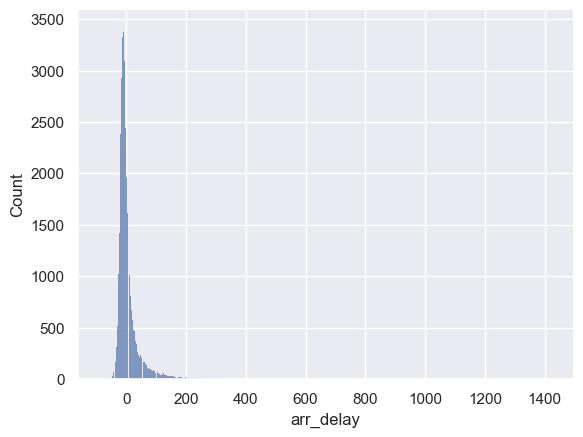

In [6]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.histplot(flights, x="arr_delay")
plt.show()

In [7]:
len(flights[flights['arr_delay']>0])

42512

#### total_delay time is highly skewed with average 17 mins delay and 7 mins early arrival as a median value.

dropping outlier for 1.5 iqr

In [8]:
# Outlier detection 

# Finding the IQR
percentile05 = flights['arr_delay'].quantile(0.05)
percentile95 = flights['arr_delay'].quantile(0.95)

# Finding upper and lower limit
upper_limit = percentile95
lower_limit = percentile05

# Finding Outliers
flights[flights['arr_delay'] > upper_limit]
flights[flights['arr_delay'] < lower_limit]

# Trimming
flights = flights[(flights['arr_delay'] < upper_limit) & (flights['arr_delay'] > lower_limit)]
flights.shape

(105178, 52)

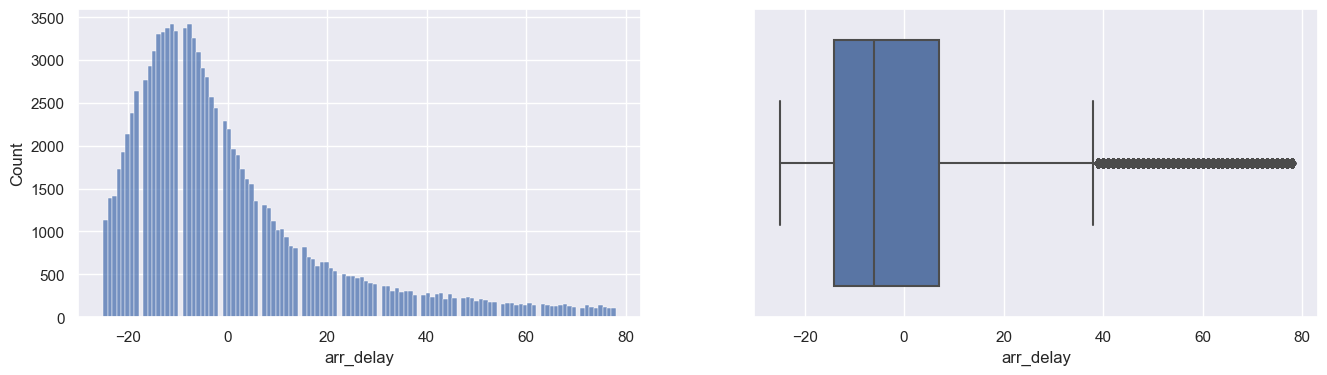

In [43]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.histplot(flights, x='arr_delay')

plt.subplot(1,2,2)
sns.boxplot(flights, x='arr_delay')

plt.show()

### 1. departure delay per origin state

In [9]:
flights_sorted = flights.sort_values('arr_delay')

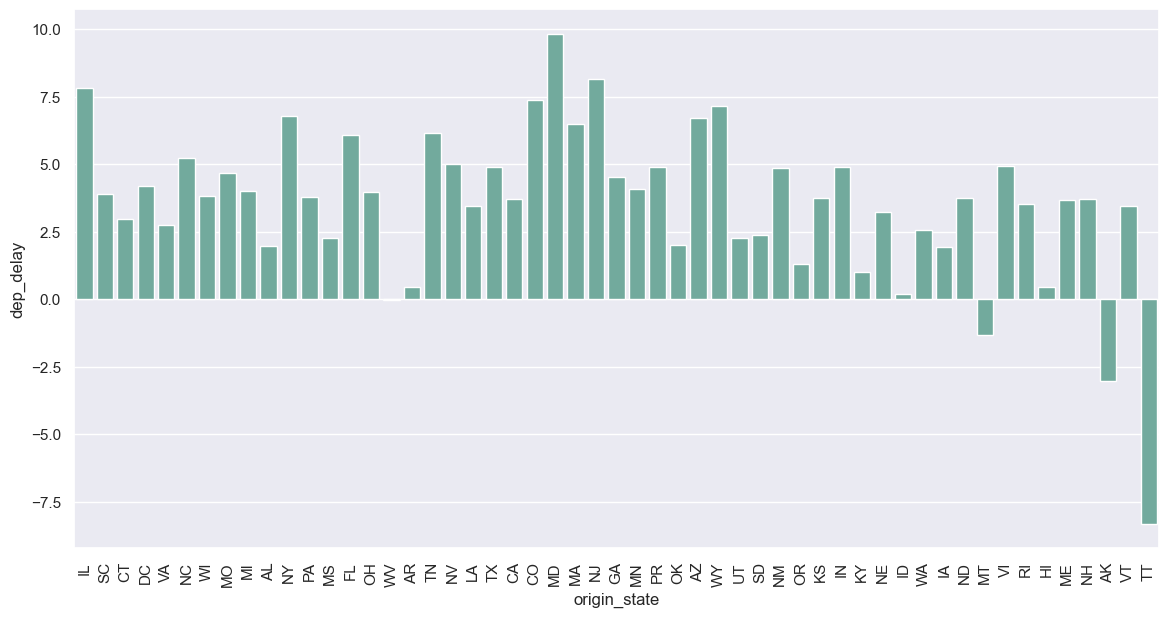

In [10]:
#set the figure size
plt.figure(figsize=(14,7))

#plot a bar chart
sns.barplot(x='origin_state', y='dep_delay', data = flights,
           estimator='mean', errorbar=None, color='#69b3a2');

plt.xticks(rotation=90)
plt.show()

#### TT includes Guam, American Samoa(Pago Pago), Saipan - islands in Pacific Ocean 

In [11]:
len(flights[flights.origin_state == 'TT'])

22

### 2. arrival delay per destination state

In [12]:
flights['net_arr_delay'] = flights['arr_delay']-flights['dep_delay']

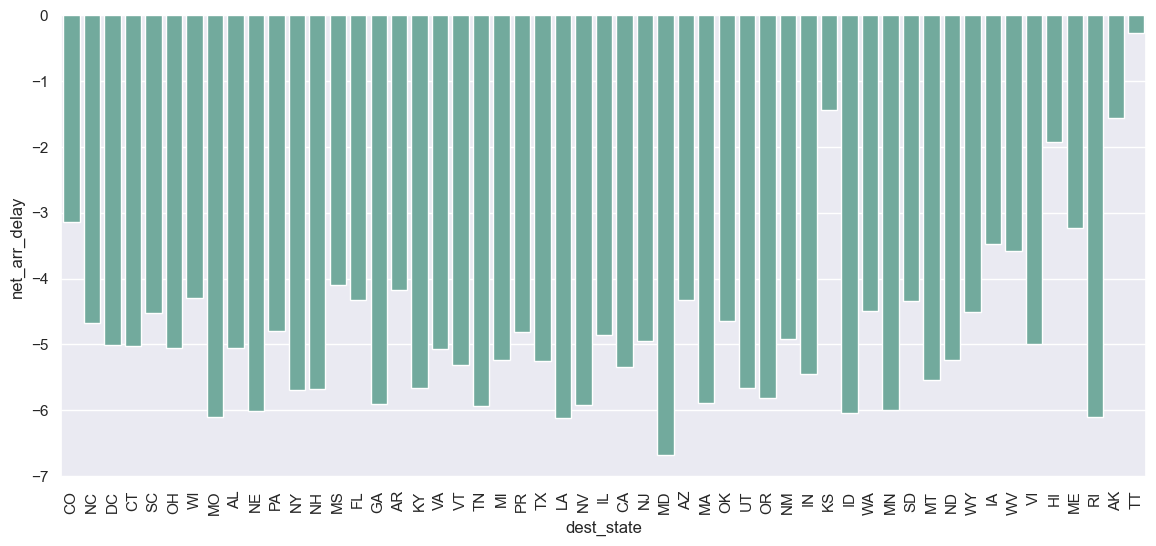

In [13]:
#set the figure size
plt.figure(figsize=(14,6))

#plot a bar chart
sns.barplot(x='dest_state', y='net_arr_delay', data = flights,
           estimator='mean', errorbar=None, color='#69b3a2');

plt.xticks(rotation=90)
plt.show()

##### This means arrival delay is mainly caused by departure delay  

In [14]:
flights['flight_date'] = pd.to_datetime(flights['fl_date'])

In [15]:
flights = flights.drop('fl_date', axis=1)

In [16]:
flights['dayofweek'] = flights.flight_date.dt.dayofweek

### 3. Delay time per day of week

In [17]:
flights.loc[flights['dayofweek'] == 0, "day"] = 'Sunday'
flights.loc[flights['dayofweek'] == 1, "day"] = 'Monday'
flights.loc[flights['dayofweek'] == 2, "day"] = 'Tuesday'
flights.loc[flights['dayofweek'] == 3, "day"] = 'Wednesday'
flights.loc[flights['dayofweek'] == 4, "day"] = 'Thursday'
flights.loc[flights['dayofweek'] == 5, "day"] = 'Friday'
flights.loc[flights['dayofweek'] == 6, "day"] = 'Saturday'

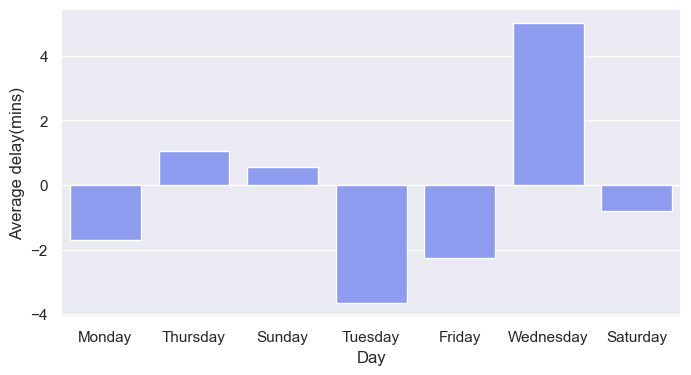

In [18]:
#set the figure size
plt.figure(figsize=(8,4))

#plot a bar chart
sns.barplot(x='day', y='arr_delay', data = flights, #order=flights.sort_values('total_delay', ascending=False).day,
           estimator='mean', errorbar=None, color='#7D91FF');

plt.xlabel('Day', fontsize = 12)
plt.ylabel('Average delay(mins)', fontsize=12)
plt.show()

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

- Hypothesis
1. Per departure/arrival location (airport)
2. per days of week
3. per weather
4. per airline
5. time of the day (hour)

In [19]:
flights['dep_condition'].unique() 
# We will need to adjust weather info to simplify to {sunny, cloudy, rainy, snow}

array(['Overcast', 'Cloudy', 'Sunny', 'Partly cloudy', 'Light snow',
       'Heavy snow', 'Moderate snow', 'Light rain shower',
       'Patchy rain possible', 'Patchy light rain', 'Patchy heavy snow',
       'Blizzard', 'Moderate rain', 'Patchy light snow', 'Light drizzle',
       'Patchy moderate snow', 'Patchy snow possible',
       'Moderate or heavy snow showers', 'Heavy rain', 'Light rain',
       'Moderate or heavy rain shower', 'Patchy light drizzle', 'Mist',
       'Fog', 'Light sleet', 'Freezing fog',
       'Thundery outbreaks possible', 'Torrential rain shower',
       'Moderate or heavy rain with thunder',
       'Patchy light snow with thunder', 'Moderate rain at times',
       'Moderate or heavy snow with thunder',
       'Patchy light rain with thunder', 'Moderate or heavy sleet',
       'Clear', 'Heavy rain at times', 'Light sleet showers',
       'Blowing snow', 'Patchy sleet possible', 'Light snow showers',
       'Moderate or heavy freezing rain', 'Ice pellets'], dty

In [20]:
flights[['crs_dep_time','dep_time']].head(2)

,crs_dep_time,dep_time
0,955,1056.0
1,2157,2158.0


In [21]:
flights[['crs_arr_time','arr_time']].head(2)

,crs_arr_time,arr_time
0,1152,1259.0
1,2311,2308.0


### 4. Delay info per month (average)

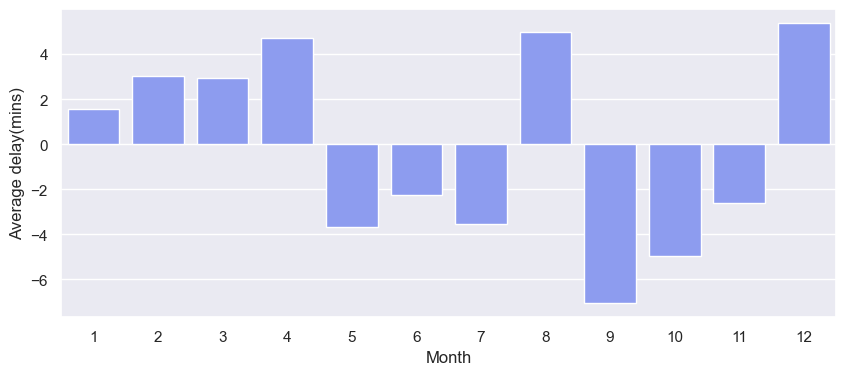

In [22]:
#set the figure size
plt.figure(figsize=(10,4))

#plot a bar chart
sns.barplot(x='month', y='arr_delay', data = flights, #order=flights.sort_values('arr_delay', ascending=False).day,
           estimator='mean', errorbar=None, color='#7D91FF');

plt.xlabel('Month', fontsize = 12)
plt.ylabel('Average delay(mins)', fontsize=12)
plt.show()

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

### 4-1. Delay info per month (median)

### We will need to address outliers and early arrivals

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [23]:
len(set(flights.dep_condition))

42

In [24]:
#weather condition has 42 types of weather. Let's simplify it to see the weather effect.

def simple_weather(row):
    if row in ['Sunny', 'Clear']:
        return 'Sunny'
    
    elif row in ['Partly cloudy','Overcast','Cloudy']:
        return 'Cloudy'
    
    elif row in ['Patchy rain possible','Light rain shower','Light drizzle','Light rain','Patchy light rain with thunder',
                 'Patchy light drizzle', 'Patchy light rain', 'Torrential rain shower', 'Heavy rain', 'Heavy rain at times',
                 'Moderate rain', 'Moderate rain at times','Moderate or heavy rain with thunder', 
                 'Moderate or heavy freezing rain']:
        return 'Rainy'
    elif row in ['Heavy snow', 'Moderate or heavy snow showers', 'Patchy heavy snow', 'Blizzard', 'Blowing snow',
                'Moderate snow', 'Moderate or heavy snow showers','Patchy moderate snow', 'Moderate or heavy sleet', 
                 'Moderate or heavy snow with thunder', 'Ice pellets', 'Light snow', 'Light sleet', 'Patchy light snow', 
                 'Light sleet showers', 'Patchy sleet possible', 'Light snow showers', 'Patchy light snow with thunder', 
                 'Patchy snow possible']:
        return 'Snowy'
    else: 
        return 'weather_others'
        

In [25]:
flights['dep_con_simple']=flights.apply(lambda row: simple_weather(row['dep_condition']), axis=1)
flights['dep_con_simple'].value_counts()

Sunny             54332
Cloudy            30664
Rainy             12711
weather_others     4260
Snowy              3211
Name: dep_con_simple, dtype: int64

<AxesSubplot:xlabel='dep_con_simple', ylabel='arr_delay'>

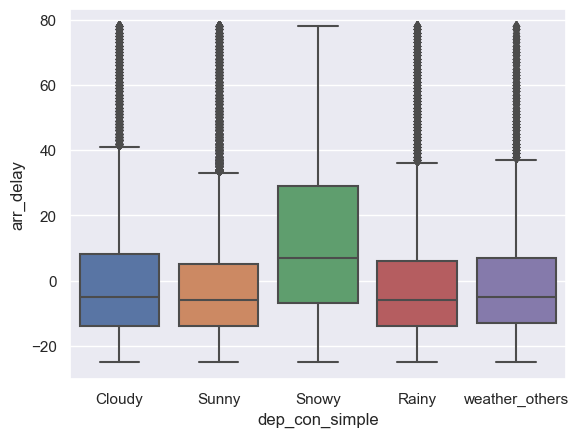

In [26]:
sns.boxplot(x='dep_con_simple', y='arr_delay', data=flights)

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [27]:
flights[['crs_dep_time','dep_time','dep_delay','taxi_out','wheels_off', 'wheels_on','taxi_in',
         'crs_arr_time','arr_time','arr_delay']].head(2)

,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay
0,955,1056.0,61.0,25.0,1121.0,1253.0,6.0,1152,1259.0,67.0
1,2157,2158.0,1.0,10.0,2208.0,2248.0,20.0,2311,2308.0,-3.0


In [28]:
flights['crs_dep_time_hr'] = flights.crs_dep_time//100

In [29]:
flights[['crs_dep_time','dep_time','dep_delay','taxi_out','wheels_off', 'wheels_on','taxi_in',
         'crs_arr_time','arr_time','arr_delay','crs_dep_time_hr']].head()

,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_dep_time_hr
0,955,1056.0,61.0,25.0,1121.0,1253.0,6.0,1152,1259.0,67.0,9
1,2157,2158.0,1.0,10.0,2208.0,2248.0,20.0,2311,2308.0,-3.0,21
2,1151,1212.0,21.0,7.0,1219.0,1328.0,3.0,1325,1331.0,6.0,11
3,1009,1013.0,4.0,32.0,1045.0,1137.0,3.0,1126,1140.0,14.0,10
4,2000,1955.0,-5.0,13.0,2008.0,2120.0,2.0,2134,2122.0,-12.0,20


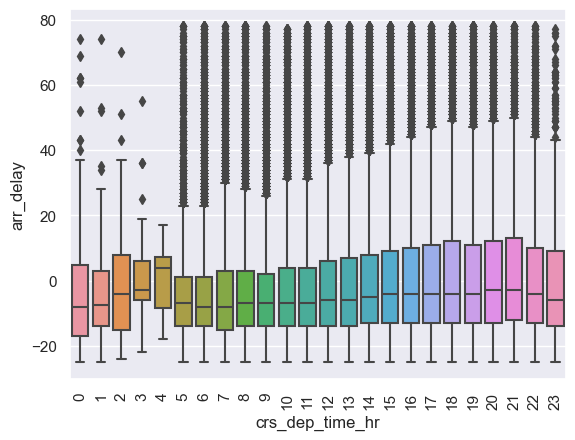

In [30]:
sns.boxplot(x='crs_dep_time_hr', y='arr_delay', data = flights)
plt.xticks(rotation=90)
plt.show()

In [31]:
traffic_hr=flights.groupby(['crs_dep_time_hr'])['crs_dep_time_hr'].count()

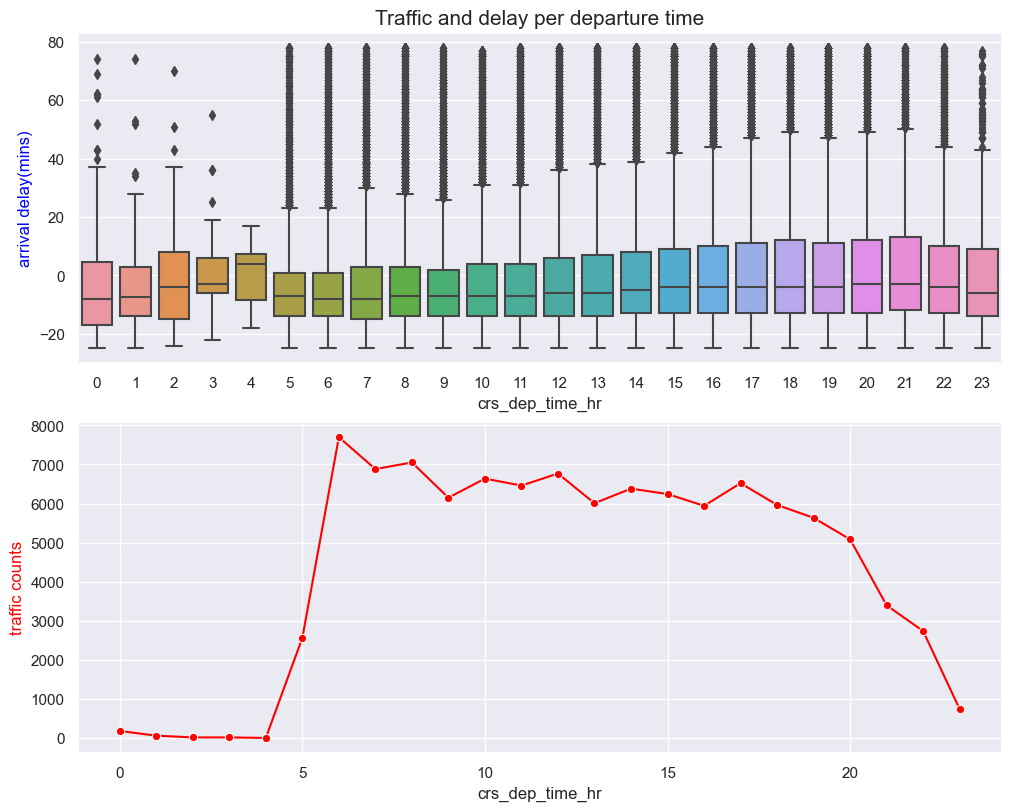

In [32]:
sns.set(style="darkgrid")

# Set the figure size
fig, ax=plt.subplots(figsize=(10,8), constrained_layout=True)
ax2=ax.twinx()

ax1=plt.subplot(2,1,1)
sns.boxplot(x='crs_dep_time_hr', y='arr_delay', ax=ax1, data = flights)
plt.title('Traffic and delay per departure time', fontsize=15)
ax1.set_ylabel('arrival delay(mins)', color='blue')

ax2=plt.subplot(2,1,2)
sns.lineplot(x=traffic_hr.index, y=traffic_hr.values, ax=ax2, marker='o', color='red')

ax.set_xlabel('scheduled departure time')
ax2.set_ylabel('traffic counts', color='red')

plt.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [33]:
busy_airports=flights.groupby(['origin_city_name'])['origin_city_name'].count().sort_values(ascending=False).head(10)

In [34]:
delay_city=flights.groupby(['origin_city_name'])['arr_delay'].mean()
busy_airports_delay = delay_city.loc[busy_airports.index]

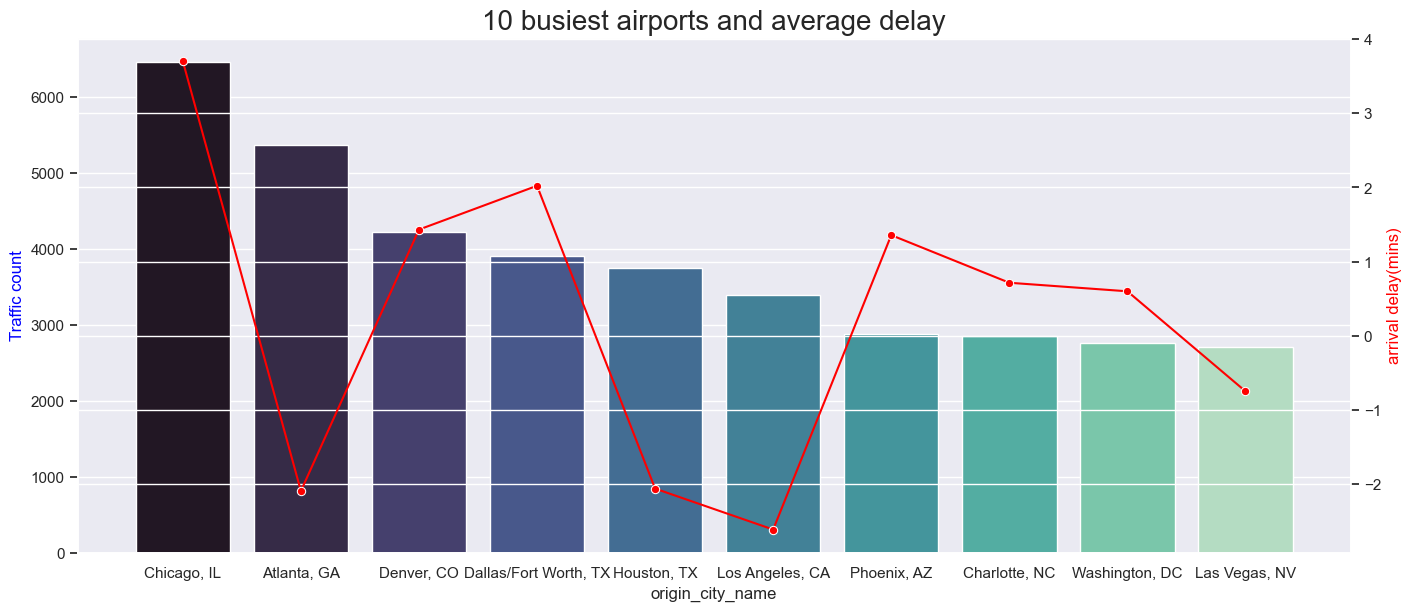

In [35]:
sns.set(style="darkgrid")

# Set the figure size
fig, ax=plt.subplots(figsize=(14,6), constrained_layout=True)

ax2=ax.twinx()

sns.barplot(x=busy_airports.index, y=busy_airports.values, ax=ax, estimator=sum, palette="mako") 
sns.lineplot(x=busy_airports.index, y=busy_airports_delay, ax=ax2, marker='o', color='red')

ax.set_xlabel('origin_city_name')
ax.set_ylabel('Traffic count', color='blue')
ax2.set_ylabel('arrival delay(mins)', color='red')

plt.xticks(rotation=45)
plt.title('10 busiest airports and average delay', fontsize=20)

plt.show()

### 5. Delay per airline

In [37]:
delay_airline = flights.groupby(['op_unique_carrier'])['arr_delay'].mean()
traffic_airline = flights.groupby(['op_unique_carrier'])['arr_delay'].count()

In [38]:
airlines = pd.merge(delay_airline, traffic_airline, right_index=True, left_index=True)
airlines.columns = ['Average_delay', 'operating_flights']

In [39]:
airlines=airlines.sort_values(by='Average_delay', ascending=False)

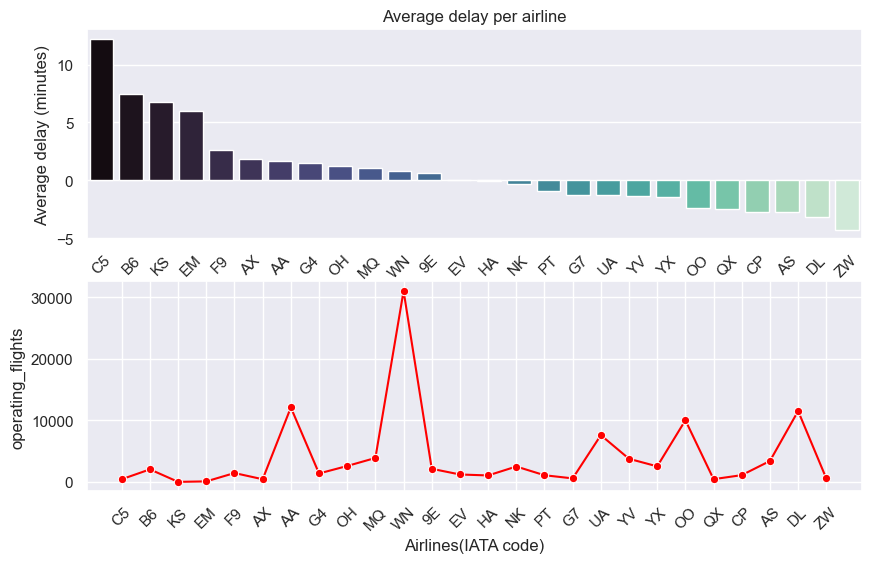

In [40]:
# Set the figure size
plt.figure(figsize=(10, 6))
ax1=plt.subplot(2,1,1)
sns.barplot(x=airlines.index, y=airlines.Average_delay, ax=ax1, estimator=sum, palette="mako")
plt.xticks(rotation=45)
plt.title('Average delay per airline')
plt.ylabel('Average delay (minutes)')

ax2=plt.subplot(2,1,2)
sns.lineplot(x=airlines.index, y=airlines.operating_flights, ax=ax2, marker='o', color='red')
plt.xticks(rotation=45)
plt.xlabel('Airlines(IATA code)')
plt.show()

In [41]:
flights.head(2)

,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,average_passengers,avg_passenger_capacity_usage,origin_state,dest_state,net_arr_delay,flight_date,dayofweek,day,dep_con_simple,crs_dep_time_hr
0,AA,AA_CODESHARE,AA,3044,OO,N761ND,3044,13930,ORD,"Chicago, IL",...,777.666667,0.776114,IL,CO,6.0,2019-01-01,1,Monday,Cloudy,9
1,AA,AA_CODESHARE,AA,5606,OH,N575NN,5606,13577,MYR,"Myrtle Beach, SC",...,4898.333333,0.774154,SC,NC,-4.0,2019-01-01,1,Monday,Cloudy,21


In [42]:
flights.to_csv('flights.csv',index=False)

flights_simple=flights.drop(['mkt_unique_carrier','branded_code_share','mkt_carrier','mkt_carrier_fl_num','cancelled',
                             'cancellation_code','diverted','dup', 'total_add_gtime','longest_add_gtime', 
                             'no_name', 'flights', 'origin_airport_id','dest_airport_id',
                             'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in','tail_num','op_carrier_fl_num',
                             'arr_date','average_seats', 'flight_date', 'day','arr_time','actual_elapsed_time',
                             'air_time','dep_delay','dep_time', 'month','year','origin_state','dest_state',
                             'net_arr_delay','origin_city_name','dest_city_name', 'arr_condition','average_passengers',
                             'avg_passenger_capacity_usage','first_dep_time'], axis=1)